In [1]:
import numpy as np
import pandas as pd
import os
import joblib

In [2]:
path1 = "/Users/adityavs14/Documents/Internship/Pianalytix/Month_2/CropY/ML_model/Crop_recommendation.csv"
path2 = "/Users/adityavs14/Documents/Internship/Pianalytix/Month_2/CropY/ML_model/yield_df.csv"
path3 = "/Users/adityavs14/Documents/Internship/Pianalytix/Month_2/CropY/ML_model/apy.csv"

In [3]:
data_recod = pd.read_csv(path1)
data_yield = pd.read_csv(path2)

In [4]:
r = data_recod["label"].unique()
print(r)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [5]:
y = data_yield.Item.unique()
print(y)

['Maize' 'Potatoes' 'Rice, paddy' 'Sorghum' 'Soybeans' 'Wheat' 'Cassava'
 'Sweet potatoes' 'Plantains and others' 'Yams']


In [6]:
data_yield = data_yield.loc[data_yield.Area == "India"]

In [7]:
data_recod.iloc[29]

N                      84
P                      51
K                      35
temperature     22.301574
humidity        80.644165
ph               6.043305
rainfall       197.979121
label                rice
Name: 29, dtype: object

# Recommendation part

In [8]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout

Init Plugin
Init Graph Optimizer
Init Kernel


In [9]:
X = data_recod.drop('label', axis=1)
y = data_recod['label']

In [10]:
from sklearn.preprocessing import LabelEncoder

lnc = LabelEncoder()

lnc.fit(y)
y = lnc.transform(y)

In [11]:
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(2200, 7)
(2200, 1)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                     random_state = 40)

In [13]:
model = Sequential()
model.add(Dense(units = 100, input_dim =X.shape[1] , activation='relu'))
model.add(Dense(units = 50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(22,activation = 'softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['acc'])
history = model.fit(X_train,y_train, validation_split = 0.2, batch_size = 20, epochs = 50, verbose = 1 )

2023-05-28 17:07:45.040370: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-28 17:07:45.041259: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


2023-05-28 17:07:45.309794: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-05-28 17:07:45.312697: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2023-05-28 17:07:52.012817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - ETA: 0s - loss: 13.6405 - acc: 0.1242

2023-05-28 17:07:53.211709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 8s 16ms/step - loss: 13.5497 - acc: 0.1256 - val_loss: 1.2557 - val_acc: 0.6420
Epoch 2/50
71/71 [==============================] - 0s 6ms/step - loss: 1.6122 - acc: 0.5030 - val_loss: 0.7848 - val_acc: 0.7926
Epoch 3/50
71/71 [==============================] - 0s 7ms/step - loss: 0.9722 - acc: 0.7233 - val_loss: 0.5832 - val_acc: 0.8523
Epoch 4/50
71/71 [==============================] - 0s 7ms/step - loss: 0.7500 - acc: 0.7680 - val_loss: 0.4403 - val_acc: 0.9006
Epoch 5/50
71/71 [==============================] - 0s 6ms/step - loss: 0.5979 - acc: 0.8127 - val_loss: 0.3820 - val_acc: 0.8750
Epoch 6/50
71/71 [==============================] - 0s 7ms/step - loss: 0.5347 - acc: 0.8191 - val_loss: 0.3119 - val_acc: 0.9034
Epoch 7/50
71/71 [==============================] - 1s 7ms/step - loss: 0.5303 - acc: 0.8239 - val_loss: 0.2638 - val_acc: 0.9318
Epoch 8/50
71/71 [==============================] - 0s 7ms/step - loss: 0.3850 - acc: 0.8846 - val_

In [14]:
import matplotlib.pyplot as plt

In [15]:
hist = pd.DataFrame(history.history)

In [16]:
hist.head()

,loss,acc,val_loss,val_acc
0,7.098030,0.230114,1.255741,0.642045
1,1.417397,0.559659,0.784807,0.792614
2,0.903455,0.732244,0.583237,0.852273
3,0.721175,0.774858,0.440259,0.900568
4,0.554111,0.821023,0.381954,0.875000


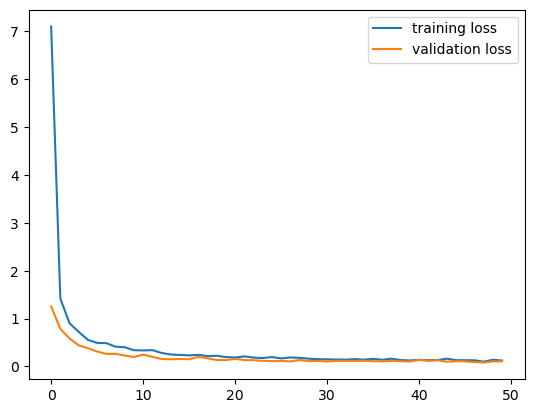

In [17]:
plt.plot(hist['loss'],label='training loss')
plt.plot(hist['val_loss'],label='validation loss')
plt.legend()

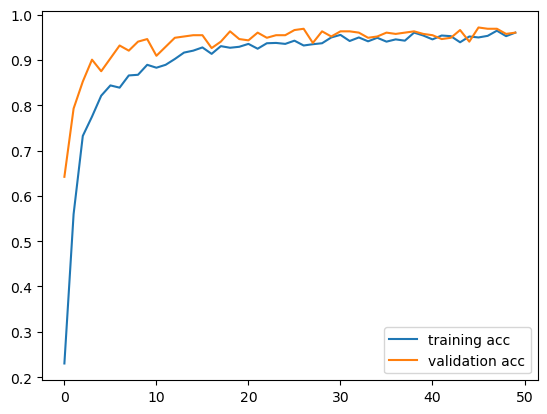

In [18]:
plt.plot(hist['acc'],label='training acc')
plt.plot(hist['val_acc'],label='validation acc')
plt.legend()

In [19]:
pred = model.predict(X_test,verbose=1)

14/14 [==============================] - 0s 3ms/step


2023-05-28 17:09:22.600905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [20]:
def pred_pipe(X,y):
    pred = model.predict(X,verbose=1)
    p = []
    for i in pred:
        p.append(np.argmax(i))
    out = pd.DataFrame({'Predicted':lnc.inverse_transform(p),'Actual':lnc.inverse_transform(y)})
    return out

In [21]:
pred_pipe(X_test,y_test)

14/14 [==============================] - 0s 2ms/step


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Predicted,Actual
0,blackgram,blackgram
1,papaya,papaya
2,coffee,coffee
3,grapes,grapes
4,mango,mango
...,...,...
435,cotton,cotton
436,banana,banana
437,chickpea,chickpea
438,apple,apple


In [22]:
model.save('recommendation.h5')
joblib.dump(lnc,'recommendation_enc.joblib',compress=9)

['recommendation_enc.joblib']

In [23]:
testx = np.asarray(data_recod.iloc[360].values[:-1]).astype(np.float32).reshape(1,-1)

testy = np.array(data_recod.iloc[360].values[-1]).reshape(1,-1)[0]
print(testx)
print(testy)
pred = model.predict(testx,verbose=1)
lnc.inverse_transform(np.array(np.argmax(pred)).reshape(1,-1))[0]

[[  7.        63.        24.        22.954582  24.035532   5.858618
  107.73154 ]]
['kidneybeans']
1/1 [==============================] - 0s 120ms/step


2023-05-28 17:11:00.800007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'kidneybeans'

In [ ]:
np.argmax(pred)

# Yield

In [26]:
data_yield

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
10502,10502,India,Cassava,1990,205381,1083.0,75000.0,25.58
10503,10503,India,Cassava,1990,205381,1083.0,75000.0,26.88
10504,10504,India,Cassava,1990,205381,1083.0,75000.0,25.79
10505,10505,India,Cassava,1990,205381,1083.0,75000.0,24.10
10506,10506,India,Cassava,1990,205381,1083.0,75000.0,25.25
...,...,...,...,...,...,...,...,...
14545,14545,India,Wheat,2013,31538,1083.0,45620.0,27.14
14546,14546,India,Wheat,2013,31538,1083.0,45620.0,25.98
14547,14547,India,Wheat,2013,31538,1083.0,45620.0,27.44
14548,14548,India,Wheat,2013,31538,1083.0,45620.0,27.44


In [27]:
X = data_yield.drop(columns = ["hg/ha_yield","Area","Unnamed: 0"])
y = data_yield["hg/ha_yield"]

In [28]:
y_f = X.columns

In [29]:
lnc1 = LabelEncoder()
lnc1.fit(X['Item'])
X['Item'] = lnc1.transform(X['Item'])
joblib.dump(lnc1,'yield_item.joblib',compress=9)


['yield_item.joblib']

In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [32]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.2, random_state = 123)
  
# Instantiation
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(train_X, train_y)
  
# Predict the model
pred = xgb_r.predict(test_X)
  
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

[17:13:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  4147.500283


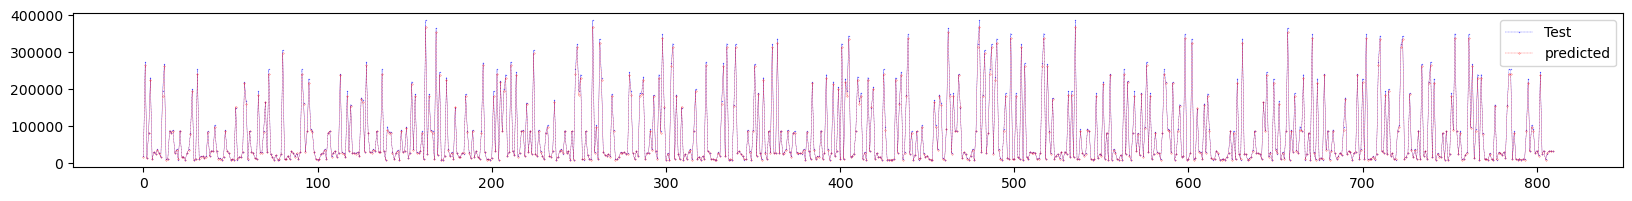

In [33]:
plt.figure(figsize=(20,2))
plt.plot(test_y.values,'b+--', markersize = 0.2,linewidth=0.2,label='Test')
plt.plot(pred,'ro--', markersize = 0.2,linewidth=0.2,label="predicted")
#plt.yscale('log')
plt.legend()
plt.show()

In [34]:
def pred_pipe2(df,y):
    lnc1 = joblib.load('yield_item.joblib')
    df['Item'] = lnc1.transform(df['Item'])
    X = df.values.reshape(1,-1)
    pred = xgb_r.predict(X)
    return pred

In [35]:
X = np.array(['Cassava',1990,1083.0,75000.0,25.58]).reshape(1,-1)
y = np.array([205381])
df = pd.DataFrame(X, columns=y_f)
print(df)
print(pred_pipe2(df,y))
print(y)


      Item  Year average_rain_fall_mm_per_year pesticides_tonnes avg_temp
0  Cassava  1990                        1083.0           75000.0    25.58
[200487.84]
[205381]


In [36]:
xgb_r.save_model('yield.json')
joblib.dump(xgb_r,'yield.joblib',compress=9)

['yield.joblib']

In [37]:
print(y_f)

Index(['Item', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp'],
      dtype='object')
